<b>Project Summary</b>

When I socialize with people I often love to drink wine, however, I am far from an expert. When I buy wine I typically assume that the higher the price of wine often translates to a better taste. Sometimes this is true but it often is false. I could never understand why wine taste good or whether or not I am paying a fair price.  

A funny joke I sometimes tell is I went on a date a few years ago and my manager at the time gave me a story to tell about a bottle of wine on the menu. I explained to my date that it is grown from a vila that is next to a volcano in Italy which translates to an excellent grape. She was so impressed that I knew so much about the wine when I only knew what I was told to say, had we had to choose another bottle of wine I would have been in a world of trouble.

Luckily I was able to find a dataset on Kaggle that interprets wine reviews. It comes with a number of attributes to do calculations such as: country, description, designation, points, price, province, province, taster name, title of review, type of grape, and winery.

There are a number of correlations I can do with this data such as:
<ul style="list-style-type:disc;">
  <li>Does the vineyard that make the wine play an important role or does the province or country more important</li>
  <li>Does the price often correlate to a good tasting wine?</li>
  <li>Does the taster impact the rating of the wine and that makes the rating impartial?</li>
  <li>Taking a deeper look at California. Resarch shows that Chardonnay is the most popular grape planted in California, with close to 95,000 planted acres. Cabernet Sauvignon is a distant second with almost 80,000 acres planted. Merlot and white Zinfandel are also popular.<br><i>Reference: <a href="https://www.thewinecellarinsider.com/california-wine/">https://www.thewinecellarinsider.com/california-wine/</a></i></li>
</ul>


My hypothesis will be:
<ul style="list-style-type:disc;">
  <li>The vineyard does not play a major role. The country or province is more important for each type of grape</li>
  <li>Price does not correlate to good tasting wine and the ratings will not increase as price increases</li>
  <li>The taster will play an important role and influence the review points of wine</li>
  <li>The research about California wine will be correct and the best wine from California will be Chardonnay, Cabernet Sauvignon, Merlot, and Zinfandel</li>
</ul>

<b>Import Modules required for Final Project</b>

We will use a few modules for this project to assist with proving or disproving the hypothesis.
<ul style="list-style-type:disc;">
    <li><b>Pandas</b> - library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. We will use pandas to load in the data into a pandas dataframe and clean the data to normalize the data to be consumable for calculations</li>
  <li><b>Numpy</b> - library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. We will use Numpy to perform several calculations such as mean, median, variance, standard deviation, and percentiles to assist with correlating the various attributes (country, province, variety, winery, and taster) using the review points and price information for each bottle of wine reviewed to assist with proving or disproving the hypothesis</li>
  <li><b>Matplotlib</b> - a plotting library for the Python programming language that can create graphical representations of data. We will use Matplotlib to extend on what Numpy calculates to visual represent the data to help prove or disprove the hypothesis</li>
  <li><b>Random</b> - a library in Python that is used to generate random numbers. We will use random to select attributes at random in addition to looking at the top 10</li>
    <li><b>Operator</b> - a module in Python that exports a set of efficient functions corresponding to the intrinsic operators of Python. We will use the operator module to sort the dictionaries used in the project</li>
    <li><b>Collections</b> - Collections in Python are containers that are used to store collections of data, for example, list, dict, set, tuple etc. The module improve the functionalities of the built-in collection containers. We will use the collection module to get the count of instances of a value</li>
    <li><b>Datetime</b> - The datetime module supplies classes for manipulating dates and times in both simple and complex ways. We will use the datetime module to capture the current time so we can calculate how long calculations take to compute.
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import operator
import collections
import datetime

<b>Load the wine reviews into a pandas dataframe</b>

Using a Pandas dataframe we load the <b><i>winemag-data-130k-v2.json</i></b> file into a Pandas dataframe. Since the data contains several attributes that are null (NA) we use the pandas method that drops null (NA) values (dropna) so we are only looking at rows that have valid values for each wine that is reviewed. A good row will be a wine that has the country, province, variety, winery, price, points, and taster with a valid value.

In [2]:
data = None # Global variable to store the wine reviews as a pandas dataframe
file_name = "winemag-data-130k-v2.json"

### Function to load the wine data into a Pandas Dataframe
def loadWineReviews(path_to_file):

    try:
        data = pd.read_json(path_to_file)
        print("Successfully loaded " + path_to_file + " into a pandas dataframe")
    except ValueError:
        print("loadWineReviews() - file: " + path_to_file + " does not exist")
    else:
        # Data columns needed for calculations: country, province, variety, winery, price, points, taster_name

        # Remove incomplete rows for columns ['country', 'province', 'variety', 'winery', 'price', 'points', 'taster_name']
        data = data.dropna(subset=['country', 'province', 'variety', 'winery', 'price', 'points', 'taster_name'])
        
        # Use only the columns needed for calculations
        data = data[['country', 'province', 'variety', 'winery', 'price', 'points', 'taster_name']]
        
        return data

# Store the wine reviews into the global variable for wine reviews
data = loadWineReviews(file_name)

Successfully loaded winemag-data-130k-v2.json into a pandas dataframe


<b>Create a resuable class that can be applied to any attribue (country, province, variety, winery, and taster_name)</b>

We will create a class that we can apply to any attribute to perform several calculations on price and points. The calculations will compute the following on price and points:
<ul style="list-style-type:disc;">
  <li>95th and 5th percentile</li>
  <li>mean, median, variance, and standard deviation of the dataset that removes values less than the 5th and greater than the 95th percentile</li>
  <li>the average points of wine for a price range with an increment of 10 (0 to 10, 10 to 20, ...)</li>
</ul>

The calculations will be used to prove or disprove the following hypothesis:
<ul style="list-style-type:disc;">
  <li>The vineyard does not play a major role. The country or province is more important for each type of grape</li>
  <li>Price does not correlate to good tasting wine and the ratings will not increase as price increases</li>
  <li>The taster will play an important role and influence the review points of wine</li>
  <li>The research about California wine will be correct and the best wine from California will be Chardonnay, Cabernet Sauvignon, Merlot, and Zinfandel</li>
</ul>

In [3]:
# Set the upper limit of the price range
upper_limit = 200
        
# Create a numpy array that contains the list of price ranges to get the mean points for
price_range = np.arange(10,upper_limit+1,10)
    
class WineCalculations:
 
    # Initialize the class with the attribute and dataset then perform a data normalization process and
    # perform several calculations relevant to prove or disprove the hypothesis
    def __init__(self, attribute, dataset):
        # set the attribute value
        self.attribute = attribute
        
        # Constrain the dataset for the attribute under evalulation
        rows = np.where((dataset[:,0] == self.attribute))
        dataset = dataset[rows[0]]
        
        # Get the list of price and points (wine reviews) for the attribute and the size of the dataset
        self.prices = dataset[:,1]
        self.points = dataset[:,2]
        self.dataset = dataset
        self.dataset_size = dataset.size
        
        self.__normalize_dataset()
        self.__perform_calculations()
        self.__get_mean_reviews_per_price_range()
        
    
    # Get a normalized dataset that removes results that are less than the 5th and greater than the 95th
    # percentile for price and reviews (points). If the result is to small it will assume the current
    # dataset
    def __normalize_dataset(self):
        # Get the 5th and 95th percentile of the price for the attribute
        self.price_5 = np.percentile(self.prices, 5)
        self.price_95 = np.percentile(self.prices, 95)
        
        # Get the 5th and 95th percentile of the points (wine reviews) for the attribute
        self.points_5 = np.percentile(self.points, 5)
        self.points_95 = np.percentile(self.points, 95)
        
        # Remove values from the list of wine prices for the given attribute if the price is less than the 5th
        # or greater than the 95th percentile
        # ** only valid if the result of the dataset is greather than 0
        if self.prices[(self.prices > self.price_5) & (self.prices <self.price_95)].size > 0:
            self.prices = self.prices[(self.prices > self.price_5) & (self.prices <self.price_95)]
            
        # Remove values from the list of wine reviews (points) for the given attribute if the points is 
        # less than the 5th or greater than the 95th percentile
        # ** only valid if the result of the dataset is greather than 0
        if self.points[(self.points > self.points_5) & (self.points <self.points_95)].size > 0:
            self.points = self.points[(self.points > self.points_5) & (self.points <self.points_95)]
    
    # Calculate the mean, median, variance, and standard deviation for price and reviews (points)
    def __perform_calculations(self):
        # calculate mean, median, variance, and standard deviation for price
        self.price_mean = round(self.prices.mean(),4)
        self.price_median = round(np.median(self.prices),4)
        self.price_variance = round(self.prices.var(),4)
        self.price_standard_deviation = round(self.prices.std(),4)
        
        # calculate mean, median, variance, and standard deviation for reviews (points)
        self.points_mean = round(self.points.mean(),4)
        self.points_median = round(np.median(self.points),4)
        self.points_variance = round(self.points.var(),4)
        self.points_standard_deviation = round(self.points.std(),4)
    
    # Calculate the mean and number of wine within the price range from $0 to $200, each range will be an
    # increment of $10. For each wine review within the range we will attempt to remove values
    # below the 5th and greater than the 95th percentile if the result is more than 0 wine reviews
    def __get_mean_reviews_per_price_range(self):    
        # Set the initial value for the price range
        lower_limit = 0
        
        # Create an empty array to eventually store the mean points and number of wine that were reviewed within
        # the price range
        mean_per_range = np.zeros(price_range.size) # mean result for wines within the price range (i.e. 0 to 10)
        count_of_wine_per_range = np.zeros(price_range.size) # count of wines within the price range (i.e. 0 to 10)

        idx = 0
        for price in price_range:
            indexes_within_range = np.where((self.dataset[:,1] > lower_limit) & (self.dataset[:,1] <= price))
            rows_within_range = self.dataset[indexes_within_range]
            
            if(rows_within_range.size > 0):
                rows_points = rows_within_range[:,2]
                
                rows_points_5 = np.percentile(rows_points,5) # get the 5th percentile
                rows_points_95 = np.percentile(rows_points,95) # get the 95th percentile
                
                indexes_between_percentile = np.where((rows_points > rows_points_5) & (rows_points < rows_points_95))
                rows_between_percentile = rows_points[indexes_between_percentile]
                
                if(rows_between_percentile.size > 0):
                    range_mean = round(rows_between_percentile.mean(),4)
                    mean_per_range[idx] = range_mean
                    count_of_wine_per_range[idx] = rows_between_percentile.size
                else:
                    range_mean = round(rows_points.mean(),4)
                    mean_per_range[idx] = range_mean
                    count_of_wine_per_range[idx] = rows_points.size
                    
            lower_limit = price
            idx += 1
        
        self.price_range_calculations = { 'mean': mean_per_range, 'count': count_of_wine_per_range }
        
    # Create a object print string that displays the revelent calcuations for the attribute
    def __str__(self):
        result = self.attribute + ", size of dataset is " + str(self.dataset_size)\
            + "\n\t---Price---"\
            + "\n\t\t5th percentile: " + str(self.price_5)\
            + "\n\t\t95th percentile: " + str(self.price_95)\
            + "\n\t\tmean: " + str(self.price_mean)\
            + "\n\t\tmedian: " + str(self.price_median)\
            + "\n\t\tvariance: " + str(self.price_variance)\
            + "\n\t\tstandard deviation: " + str(self.price_standard_deviation)\
            + "\n\t---Reviews (Points)---"\
            + "\n\t\t5th percentile: " + str(self.points_5)\
            + "\n\t\t95th percentile: " + str(self.points_95)\
            + "\n\t\tmean: " + str(self.points_mean)\
            + "\n\t\tmedian: " + str(self.points_median)\
            + "\n\t\tvariance: " + str(self.points_variance)\
            + "\n\t\tstandard deviation: " + str(self.points_standard_deviation)\
            + "\n\t---Mean Per Price Range---"
        
        idx = 0
        for price in price_range:
            result = result + "\n\t\t$" + str(price-10) + " to $" + str(price) + ": "\
            + "Mean = " + str(self.price_range_calculations['mean'][idx])\
            + ", Count: " + str(self.price_range_calculations['count'][idx])
        
            idx+=1
        return result

<b>Perform the wine calculations for each attribute: ['country', 'province', 'variety', 'winery', 'taster_name']</b>

Each attribute will get the unique values in the attribute and use the WineCalculations class to calculate the correlations computed in the class to be used to prove or disprove the hypothesis

In [4]:
attributes = ['country', 'province', 'variety', 'winery', 'taster_name']
calculations = {}

for attr in attributes:
    calculation_start = datetime.datetime.now()
    print("Starting to calculate: " + attr)
    
    dataset = np.array(data.loc[:,[attr,'price','points']].values)
    unique_attributes = np.unique(dataset[:,0])

    attribute_calculations = {}
    for item in unique_attributes:
        attribute_calculation = WineCalculations(item, dataset)
        attribute_calculations.update({item: attribute_calculation})

    calculations.update({attr: attribute_calculations})
    
    calculation_end = datetime.datetime.now()
    calculation_duration = (calculation_end - calculation_start).total_seconds()
    print("Completed calcuations for: " + attr + ", total seconds: " + str(calculation_duration) + " seconds")

#for attr in attributes:
#    print("--------\nAttribute: " + attr + "\n--------")
#    for calc in calculations[attr]:
#        print(calc)

Starting to calculate: country
Completed calcuations for: country, total seconds: 1.000733 seconds
Starting to calculate: province
Completed calcuations for: province, total seconds: 4.012176 seconds
Starting to calculate: variety
Completed calcuations for: variety, total seconds: 5.884071 seconds
Starting to calculate: winery
Completed calcuations for: winery, total seconds: 104.605371 seconds
Starting to calculate: taster_name
Completed calcuations for: taster_name, total seconds: 0.876738 seconds


<b>Hypothesis #1: Does the vineyard that make the wine play an important role or does the province or country more important?</b>

The data set provides review points for type of grape (variety) which we can do correlations on average (mean) of each variety broken down by vineyard, province, and country to determine the best wine.

We will look at the 10 most reviewed varieties (type of grape) and create a chart that displays the mean rating of the variety for winery, country, and province to see where the highest rated wine is from.

In [13]:
type_of_wine_calculations = {}
max_items = 10

# Function to get the 'max_items' most reviewed wines for the type of wine under review for a winery, country, or province
def get_wine_type_calculations(dataset,index):
    unique_attributes = np.unique(dataset[:,index])
        
    attribute_calculations = {}
    for item in unique_attributes:
        attribute_calculation = WineCalculations(item,dataset[:,[index,4,5]])
        attribute_calculations.update({attribute_calculation.attribute: attribute_calculation})
    
    # limit the result to only the 'max_items' most attributres
    attribute_calculations = sorted(attribute_calculations.values(), key=operator.attrgetter('dataset_size'),\
                                    reverse=True)[:max_items]
    
    return attribute_calculations

for type_of_wine in (sorted(calculations['variety'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items]):
    calculation_start = datetime.datetime.now()
    # Limit dataset to wine only from the type of grape under review
    dataset = dataset = np.array(data.loc[:,['variety','winery','country','province','price','points']].values)
    dataset_indexes = {'variety': 0, 'winery': 1, 'country': 2, 'province': 3, 'price': 4, 'points': 5}
    
    indexs_with_type_of_wine = np.where((dataset[:,dataset_indexes['variety']] == type_of_wine.attribute))
    dataset = dataset[indexs_with_type_of_wine]
    
    # For the type of grape under review get the wine calculations for winery, country, and provinces
    type_of_wine_wineries = get_wine_type_calculations(dataset,dataset_indexes['winery'])
    type_of_wine_countries = get_wine_type_calculations(dataset,dataset_indexes['country'])
    type_of_wine_provinces = get_wine_type_calculations(dataset,dataset_indexes['province'])
    
    type_of_wine_calculations.update({type_of_wine.attribute: \
                                      {\
                                       'countries': type_of_wine_countries,\
                                       'wineries': type_of_wine_wineries,\
                                       'provinces': type_of_wine_provinces
                                      }
                                     })
    
    calculation_end = datetime.datetime.now()
    calculation_duration = (calculation_end - calculation_start).total_seconds()
    print("Completed calcuations for: " + type_of_wine.attribute + ", total seconds: " \
          + str(calculation_duration) + " seconds")
    

Completed calcuations for: Pinot Noir, total seconds: 6.742364 seconds
Completed calcuations for: Chardonnay, total seconds: 6.606953 seconds
Completed calcuations for: Red Blend, total seconds: 6.62539 seconds
Completed calcuations for: Cabernet Sauvignon, total seconds: 4.869172 seconds
Completed calcuations for: Bordeaux-style Red Blend, total seconds: 4.068624 seconds
Completed calcuations for: Riesling, total seconds: 1.944189 seconds
Completed calcuations for: Sauvignon Blanc, total seconds: 2.707822 seconds
Completed calcuations for: Syrah, total seconds: 2.092752 seconds
Completed calcuations for: Rosé, total seconds: 2.491217 seconds
Completed calcuations for: Malbec, total seconds: 1.28546 seconds


<b><i>Plot graph for hypothesis #1</b></i>

We now have the calculations for the mean of the top 10 countries, provinces, and wineries for each top 10 type of grapes (variety).

We will plot a line graph that displays the mean reviews (points) for each country, provinces, and winery per grape (top 10 only). The graph will indicate where the highest reviews come from to prove or disprove the hypothesis.
<ul>
    <li>Countries - represented as a blue line</li>
    <li>Provinces - represented as a orange line</li>
    <li>Wineries - represented as a red line</li>
</ul>

<Figure size 432x288 with 0 Axes>

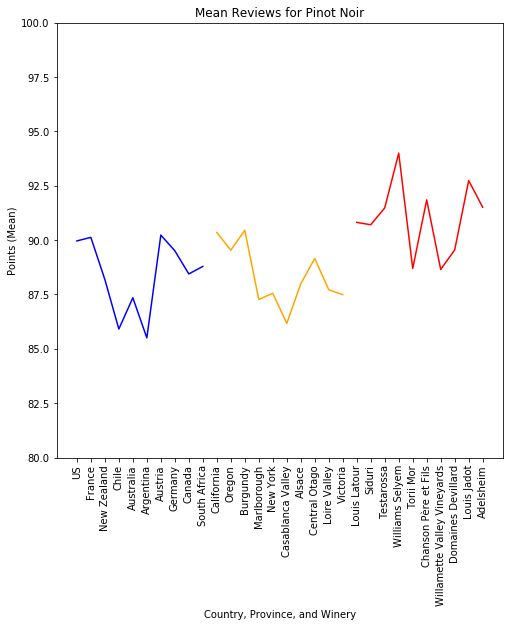

<Figure size 432x288 with 0 Axes>

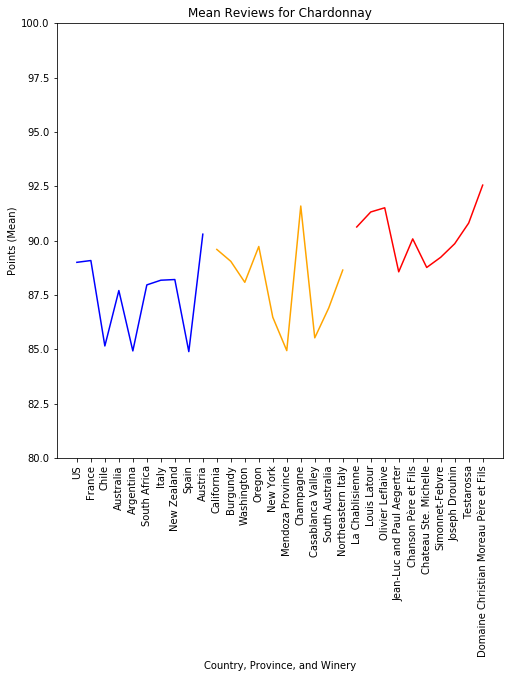

<Figure size 432x288 with 0 Axes>

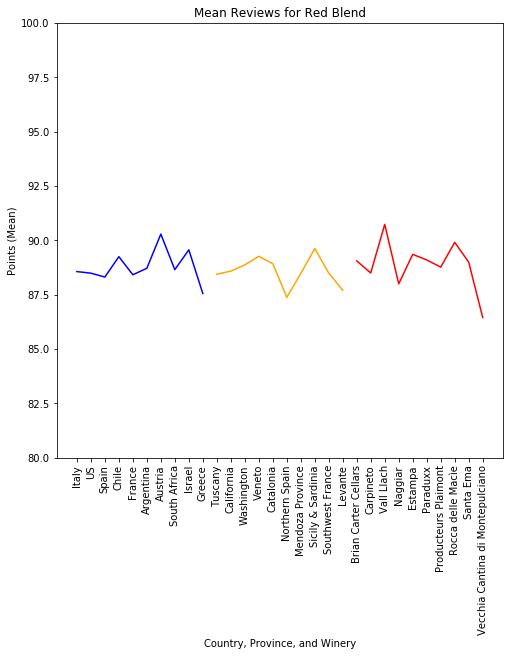

<Figure size 432x288 with 0 Axes>

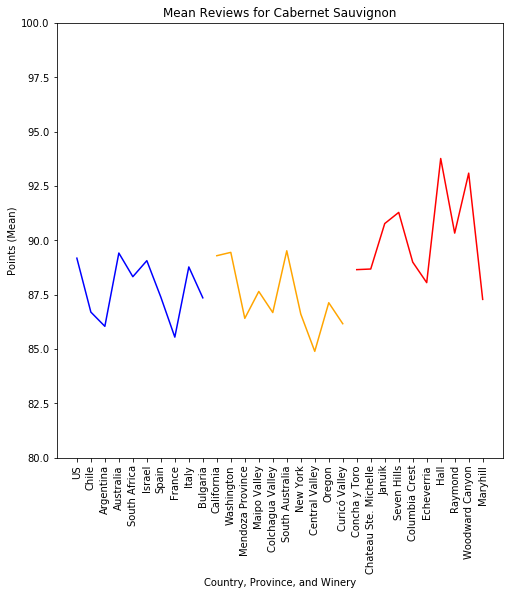

<Figure size 432x288 with 0 Axes>

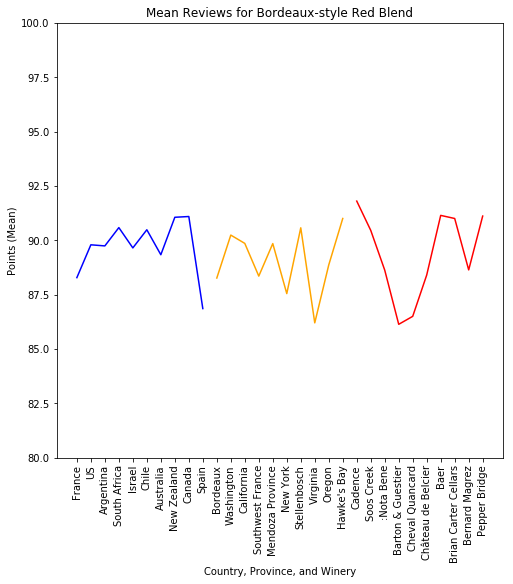

<Figure size 432x288 with 0 Axes>

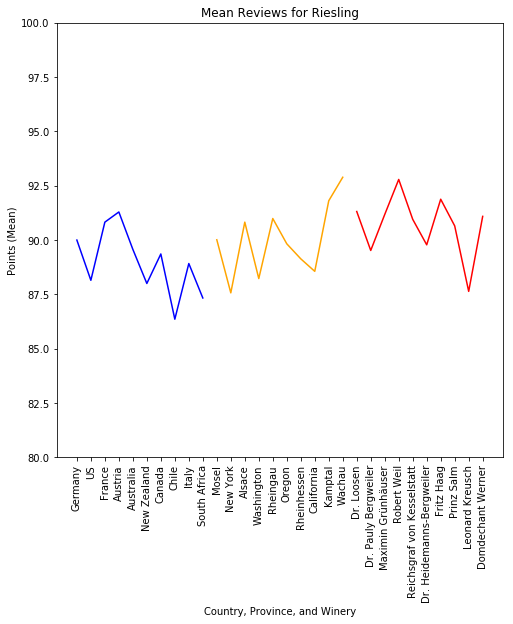

<Figure size 432x288 with 0 Axes>

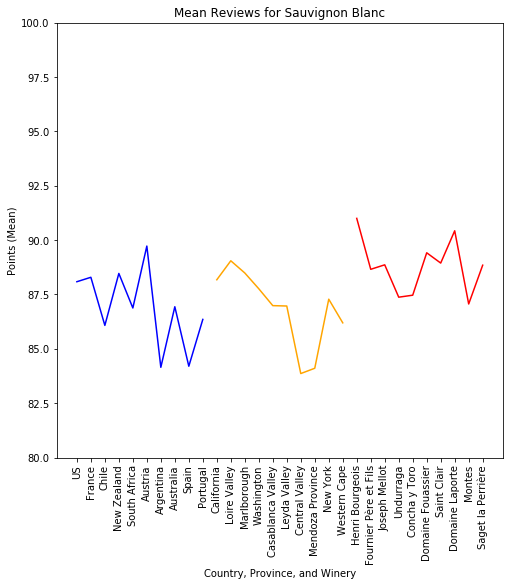

<Figure size 432x288 with 0 Axes>

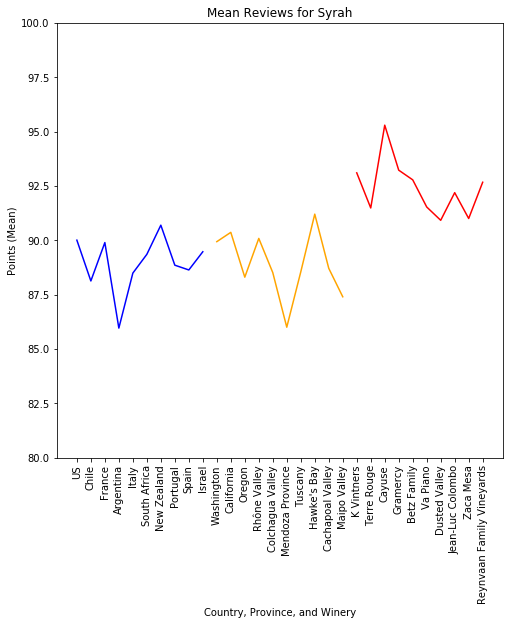

<Figure size 432x288 with 0 Axes>

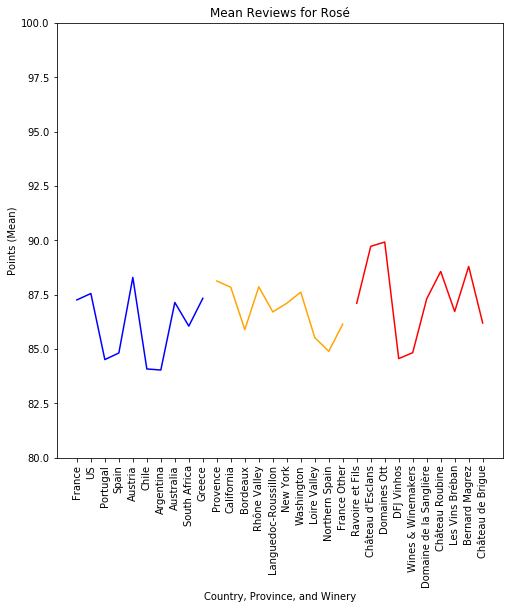

<Figure size 432x288 with 0 Axes>

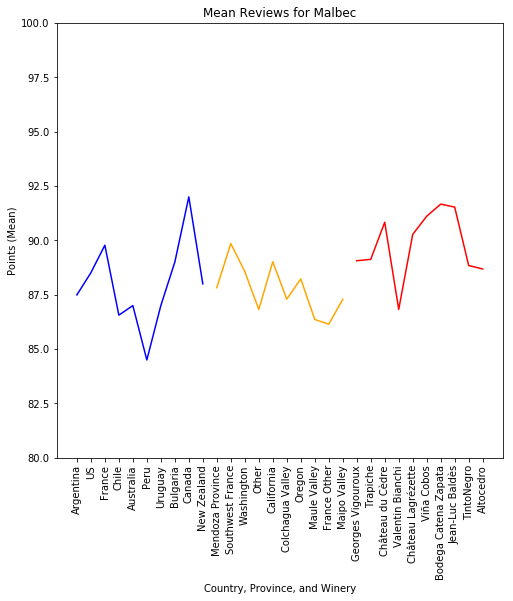

In [6]:
for k,v in type_of_wine_calculations.items():    
    # Country
    countries = [country.attribute for country in v['countries']]
    mean_points_per_country = [country.points_mean for country in v['countries']]
    
    # Province
    provinces = [province.attribute for province in v['provinces']]
    mean_points_per_province = [province.points_mean for province in v['provinces']]
    
    # Plot by Winery
    wineries = [winery.attribute for winery in v['wineries']]
    mean_points_per_winery = [winery.points_mean for winery in v['wineries']]
    
    # Plot overall
    plt.clf()
    fig,ax = plt.subplots(figsize=(8,8))
    plt.plot(countries,mean_points_per_country,c='blue')
    plt.plot(provinces,mean_points_per_province,c='orange')
    plt.plot(wineries,mean_points_per_winery,c='red')
    ax.set(xlabel='Country, Province, and Winery',ylabel='Points (Mean)', title="Mean Reviews for " + str(k))
    #plt.plot((countries + provinces + wineries), \
    #         (mean_points_per_country + mean_points_per_province + mean_points_per_winery),c="red")
    plt.xticks(rotation=90)
    plt.ylim(bottom=80,top=100)
    plt.show()

<i><b>Result of Hypothesis 1</b></i>

The graphs above show that the winery consistently has the highest mean wine reviews (points) compared with the country and province. This would indicate that the vineyard (winery) is the most important aspect to find the best wine for a type of grape (variety).

My original hypothesis was the vineyard does not play a major role. The country or province is more important for each type of grape.

<b><i>This hypothesis was proven wrong by the analysis above, the vineyard plays the most important role for purchasing quality wine for a given type of grape (variety)</i><b>

<b>Hypothesis 2: Does the price often correlate to a good tasting wine?</b>

The data set provides review points and price of wine that we can break down into price ranges to get the mean points for each price range.

We will look at the 20 most reviewed varieties (type of grape), countries, and provinces to determine if the quality of the wine increases or decreases as price increase. Our price range will start at 0 and end at 200 dollars with increments of 10 (i.e. 0 to 10, ..., 190 to 200)

<Figure size 432x288 with 0 Axes>

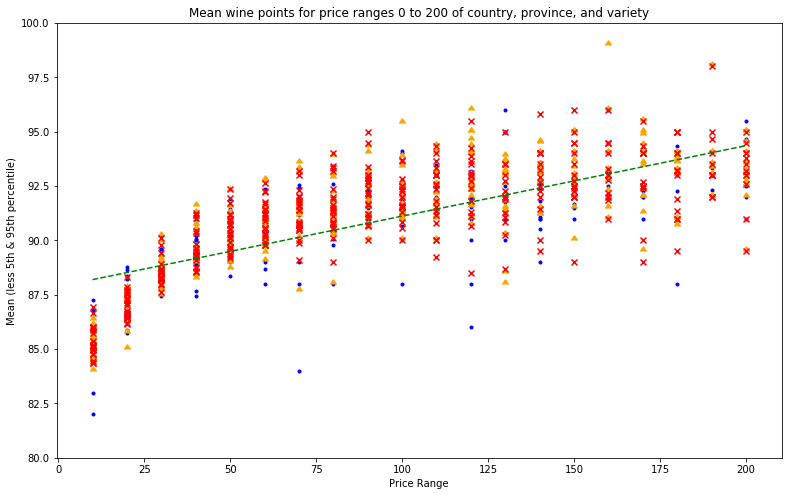

----
Countries in graph: US, France, Italy, Spain, Portugal, Chile, Argentina, Austria, Germany, Australia, New Zealand, South Africa, Israel, Greece, Canada, Hungary, Bulgaria, Romania, Uruguay, Turkey
----
Provinces in graph: California, Washington, Oregon, Bordeaux, Northern Spain, Tuscany, Mendoza Province, Burgundy, New York, Piedmont, Alsace, Loire Valley, Southwest France, Champagne, Northeastern Italy, South Australia, Douro, Catalonia, Provence, Veneto
----
Varities in graph: Pinot Noir, Chardonnay, Red Blend, Cabernet Sauvignon, Bordeaux-style Red Blend, Riesling, Sauvignon Blanc, Syrah, Rosé, Malbec, Portuguese Red, Merlot, Sangiovese, Nebbiolo, Tempranillo, White Blend, Sparkling Blend, Zinfandel, Pinot Gris, Rhône-style Red Blend
----


In [7]:
max_items = 20
# Get the top 20 varieties (type of grape), countries, and provinces
wine_varieties = (sorted(calculations['variety'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items])
wine_countries = (sorted(calculations['country'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items])
wine_provinces = (sorted(calculations['province'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items])


# Country
country_means = [country.price_range_calculations['mean'] for country in wine_countries]
countries = [country.attribute for country in wine_countries]
# Provinces
province_means = [province.price_range_calculations['mean'] for province in wine_provinces]
provinces = [province.attribute for province in wine_provinces]
#wine varieties
variety_means = [variety.price_range_calculations['mean'] for variety in wine_varieties]
varities = [variety.attribute for variety in wine_varieties]

plt.clf()
fig,ax = plt.subplots(figsize=(13,8))
plt.xlabel('Price Range')
plt.ylabel('Mean (less 5th & 95th percentile)')
plt.title('Mean wine points for price ranges 0 to 200 of country, province, and variety')
plt.ylim(bottom=80,top=100)

trendline = [] # intialize the trendline array that will be used in the graph

# plot top 'max_items' countries
for item in country_means:
    plt.scatter(price_range,item,c='blue',marker='.')
    trendline.append(item)

# plot top 'max_items' provinces
for item in province_means:
    plt.scatter(price_range,item,c='orange',marker=10)
    trendline.append(item)
    
# plot top 'max_items' varities
for item in variety_means:
    plt.scatter(price_range,item,c='red',marker='x')
    trendline.append(item)

# convert the trendline to a numpy array and replace zero values with NAN
trendline = np.array(trendline)
trendline[trendline == 0] = np.nan

# calculate the trendline
trendline = np.nanmean(trendline, axis=0)
z = np.polyfit(price_range, trendline, 1)
p = np.poly1d(z)
plt.plot(price_range,p(price_range),"g--")
    
plt.show()

print('----')
print("Countries in graph: " + (', '.join(countries)))
print('----')
print("Provinces in graph: " + (', '.join(provinces)))
print('----')
print("Varities in graph: " + (', '.join(varities)))
print('----')

<i><b>Result of Hypothesis 2</b></i>

The scatter plot above shows the mean (average) points for wine within a price range for countries, provinces, and varities.
<ul>
    <li>Countries - represented as blue circles</li>
    <li>Provinces - represented as orange triangles</li>
    <li>Varieties - represented as red 'x'</li>
</ul>

The graph shows that for countries, provinces, and varieties the average points increases as the price goes up. The trendline for the scatter plot also represents the quality of the wine increases as price goes up.

My original hypothesis was price does not correlate to good tasting wine and the ratings will not increase as price increases

<b><i>This hypothesis was proven wrong by the analysis above, as price goes up the quality of wine increases based on the average points for the wine within that range increasing for all attributes (country, province, and variety)</i><b>

<b>Hypothesis 3: Does the taster impact the rating of the wine and that makes the rating impartial?</b>

The dataset provides the taster who reviewed the wine and each wine reviewed contains the country, province, and variety. We will look at the top 10 tasters who reviewed the most wine and get the mean (average) for each taster for the top countries, provinces, and varieties with the most wines reviewed. The result should show if the tasters for each attribute is similar or disparate.

In [8]:
max_items = 1
# Get the top for each category
most_variety = (sorted(calculations['variety'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items])[0].attribute
most_country = (sorted(calculations['country'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items])[0].attribute
most_province = (sorted(calculations['province'].values(), key=operator.attrgetter('dataset_size'),\
                            reverse=True)[:max_items])[0].attribute
max_tasters = 10


def get_top_tasters_for_an_attribute(attribute_type, attribute_value):
    dataset = np.array(data.loc[:,[attribute_type,'taster_name','price','points']].values)
    dataset_indexes = {attribute_type: 0, 'taster_name': 1, 'price': 2, 'points': 3}

    indexes_with_attribute = np.where((dataset[:,dataset_indexes[attribute_type]] == attribute_value))
    dataset = dataset[indexes_with_attribute]
    
    taster_review_count = collections.Counter(dataset[:,dataset_indexes['taster_name']])
    taster_most_common_count = taster_review_count.most_common(max_tasters)
    taster_most_common = [item[0] for index, item in enumerate(taster_most_common_count)]
    
    taster_mean = {}
    for taster in taster_most_common:
        indexes_with_taster = np.where((dataset[:,dataset_indexes['taster_name']] == taster))
        dataset_taster = dataset[indexes_with_taster]
        
        taster_mean_of_reviews = 0
        if(dataset_taster.size > 0):
            taster_mean_of_reviews = round(dataset_taster[:,3].mean(),4)
        
        taster_mean.update({taster: taster_mean_of_reviews})
   
    return {'mean': taster_mean, 'count': taster_most_common_count}


# get the top 'max_tasters' for the variety with the most reviews
most_common_taster_variety = get_top_tasters_for_an_attribute('variety',most_variety)
# get the top 'max_tasters' for the country with the most reviews
most_common_taster_country = get_top_tasters_for_an_attribute('country',most_country)
# get the top 'max_tasters' for the province with the most reviews
most_common_taster_province = get_top_tasters_for_an_attribute('province',most_province)

<b><i>Plot a graph for the top tasters for the most common variety</i></b>

<Figure size 432x288 with 0 Axes>

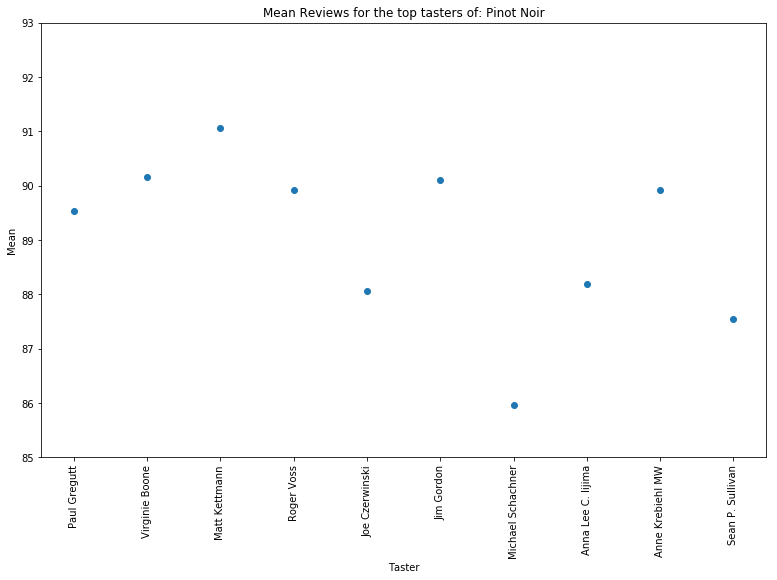

--- # of wine reviewed per taster ---
	Paul Gregutt: 2714
	Virginie Boone: 1887
	Matt Kettmann: 1554
	Roger Voss: 1479
	Joe Czerwinski: 607
	Jim Gordon: 560
	Michael Schachner: 515
	Anna Lee C. Iijima: 199
	Anne Krebiehl MW: 155
	Sean P. Sullivan: 55


In [9]:
plt.clf()
fig,ax = plt.subplots(figsize=(13,8))
plt.xlabel('Taster')
plt.ylabel('Mean')
plt.title('Mean Reviews for the top tasters of: ' + most_variety)
plt.ylim(bottom=85,top=93)
plt.scatter(most_common_taster_variety['mean'].keys(),most_common_taster_variety['mean'].values())
plt.xticks(rotation=90)
plt.show()

print('--- # of wine reviewed per taster ---')
for k,v in  most_common_taster_variety['count']:
    print("\t" + k + ": " + str(v))

<b><i>Plot a graph for the top tasters for the most common country</i></b>

<Figure size 432x288 with 0 Axes>

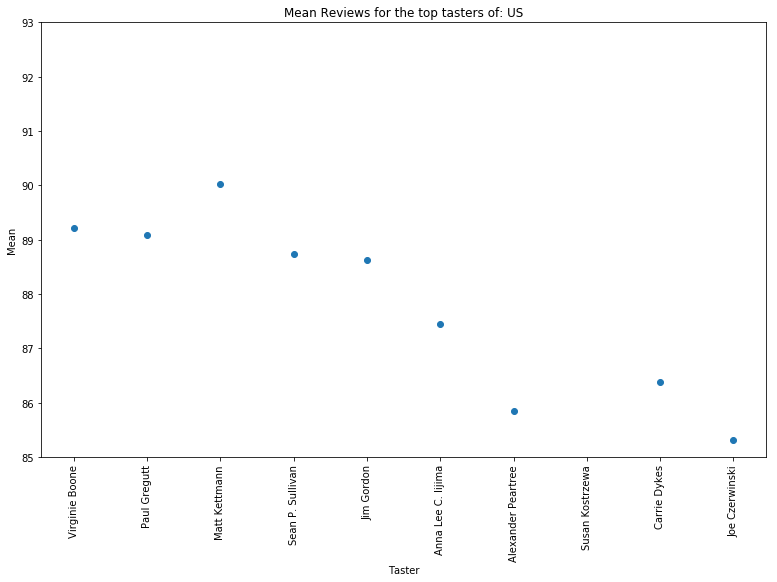

--- # of wine reviewed per taster ---
	Virginie Boone: 9507
	Paul Gregutt: 9271
	Matt Kettmann: 6236
	Sean P. Sullivan: 4893
	Jim Gordon: 4171
	Anna Lee C. Iijima: 2425
	Alexander Peartree: 413
	Susan Kostrzewa: 230
	Carrie Dykes: 138
	Joe Czerwinski: 103


In [10]:
plt.clf()
fig,ax = plt.subplots(figsize=(13,8))
plt.xlabel('Taster')
plt.ylabel('Mean')
plt.title('Mean Reviews for the top tasters of: ' + most_country)
plt.ylim(bottom=85,top=93)
plt.scatter(most_common_taster_country['mean'].keys(),most_common_taster_country['mean'].values())
plt.xticks(rotation=90)
plt.show()

print('--- # of wine reviewed per taster ---')
for k,v in  most_common_taster_country['count']:
    print("\t" + k + ": " + str(v))

<b><i>Plot a graph for the top tasters for the most common province</i></b>

<Figure size 432x288 with 0 Axes>

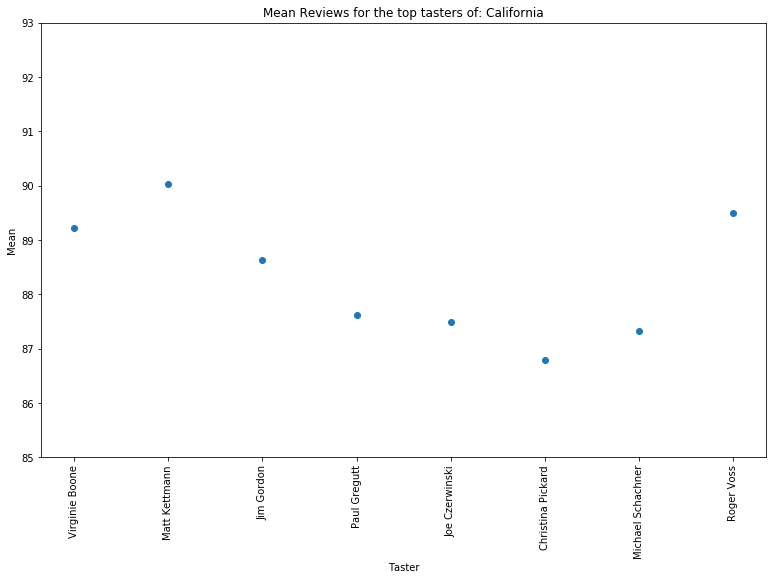

--- # of wine reviewed per taster ---
	Virginie Boone: 9502
	Matt Kettmann: 6235
	Jim Gordon: 4167
	Paul Gregutt: 112
	Joe Czerwinski: 16
	Christina Pickard: 5
	Michael Schachner: 3
	Roger Voss: 2


In [11]:
plt.clf()
fig,ax = plt.subplots(figsize=(13,8))
plt.xlabel('Taster')
plt.ylabel('Mean')
plt.title('Mean Reviews for the top tasters of: ' + most_province)
plt.ylim(bottom=85,top=93)
plt.scatter(most_common_taster_province['mean'].keys(),most_common_taster_province['mean'].values())
plt.xticks(rotation=90)
plt.show()

print('--- # of wine reviewed per taster ---')
for k,v in  most_common_taster_province['count']:
    print("\t" + k + ": " + str(v))

<i><b>Result of Hypothesis 3</b></i>

The scatter plot above for the variety of 'Pinot Noir', country of 'US', and province of 'California' shows up to the 10 most tasters who reviewed wine and the mean of the points they scored.

The graph shows that the taster is disparate and has a wide range.

My original hypothesis was the taster will play an important role and influence the review points of wine.

<b><i>This hypothesis was proven correct by the analysis above, the taster mean review points is not linear and has a wide range for each taster</i><b>

<b>Hypothesis 4: The research about California wine will be correct and the best wine from California will be Chardonnay, Cabernet Sauvignon, Merlot, and Zifandel</b>

The dataset provides the wine reviews for the provinces and we can look at the California province to compare the wine varieties (grapes) to determine which grape is the best. We will get the mean of each grape in California, order the result from best to worst, and determine which grapes are above the mean of all wine in California.

If the hypothesis is true we will prove the Chardonnay, Cabernet Sauvignon, Merlot, and Zinfandel are either the highest rated wine by order or above the overall mean across all grapes.

To prevent cheap or expensive wine from distorting the results we will assume the wine must cost between 25 to 75 dollars.

<Figure size 432x288 with 0 Axes>

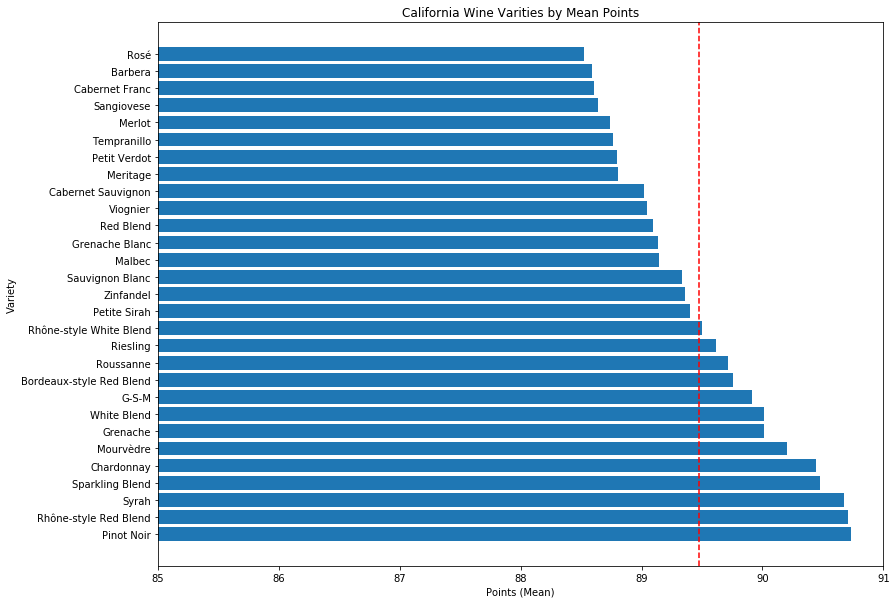

--- # of wine reviewed per variety ---
	Pinot Noir: 10011
	Rhône-style Red Blend: 867
	Syrah: 2475
	Sparkling Blend: 564
	Chardonnay: 5535
	Mourvèdre: 246
	Grenache: 657
	White Blend: 243
	G-S-M: 189
	Bordeaux-style Red Blend: 831
	Roussanne: 138
	Riesling: 153
	Rhône-style White Blend: 213
	Petite Sirah: 984
	Zinfandel: 2724
	Sauvignon Blanc: 981
	Malbec: 318
	Grenache Blanc: 111
	Red Blend: 2040
	Viognier: 369
	Cabernet Sauvignon: 4194
	Meritage: 198
	Petit Verdot: 177
	Tempranillo: 228
	Merlot: 861
	Sangiovese: 306
	Cabernet Franc: 537
	Barbera: 336
	Rosé: 318


In [12]:
# Get wine from California greater than or equal to $25 and less than or equal to $75
dataset = np.array(data.loc[:,['variety','price','points','province']].values)
rows = np.where((dataset[:,3] == 'California') & (dataset[:,1] >= 25) & (dataset[:,1] <= 75))
dataset = dataset[rows[0]]

# Get the unique varities for California wine
unique_varities = np.unique(dataset[:,0])

# Get Wine Calculations for each variety
california_calculations = []
for variety in unique_varities:
    california_variety = WineCalculations(variety, dataset[:,[0,1,2]])
    california_calculations.append(california_variety)

max_items = 100
# Limit varities that have >= 'max_items' reviews
california_calculations = [i for i in california_calculations if i.dataset_size >= max_items]

# order from highest to lowest
ranked_varities = sorted(california_calculations, key=lambda x: x.points_mean, reverse=True)
ranked_varities_mean = np.mean([i.points_mean for i in ranked_varities])

# plot graph
plt.clf()
fig, ax = plt.subplots(figsize=(13,10))
ax.barh([i.attribute for i in ranked_varities], \
        [i.points_mean for i in ranked_varities])
ax.set(xlabel='Points (Mean)', ylabel='Variety', title='California Wine Varities by Mean Points')
plt.xlim(left=85,right=91)
ax.axvline(ranked_varities_mean, ls='--', color='r')
    
plt.show()

print('--- # of wine reviewed per variety ---')
for i in ranked_varities:
    print("\t" + i.attribute + ": " + str(i.dataset_size))

<i><b>Result of Hypothesis 4</b></i>

The bar char above represents the wine reviews of the type of grape (variety) for wine from 'California'

Based on online research we assumed that Chardonnay, Cabernet Sauvignon, Merlot, and Zinfandel are the best wine from California. We set out to prove that by comparing the type of grape and determining if it is one of the highest rated wine or above the overall average where the price is between 25 and 75 dollars.

The results show:
<ul>
    <li>Chardonnay - above the overall average</li>
    <li>Cabernet Sauvignon - bellow the overall average</li>
    <li>Merlot - bellow the overall average</li>
    <li>Zinfandel - bellow the overall average</li>
</ul>

Based on the analysis the market research was wrong. While these grapes may be popular they are not the best wine you can purchase from California. The best wine that is above the overall average is:
<ul>
    <li>Pinot Noir</li>
	<li>Rhône-style Red Blend</li>
	<li>Syrah</li>
	<li>Sparkling Blend</li>
	<li>Chardonnay</li>
	<li>Mourvèdre</li>
	<li>Grenache</li>
	<li>White Blend</li>
	<li>G-S-M</li>
	<li>Bordeaux-style Red Blend</li>
	<li>Roussanne</li>
	<li>Riesling</li>
	<li>Rhône-style White Blend</li>
</ul>

<b><i>This hypothesis was proven incorrect by the analysis above, the best wine in the market research in 'California' is Chardonnay but not Cabernet Sauvignon, Merlot, and Zifandel</i><b>